# Final Project 1 (Kelompok 5)

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

# Perkenalan 

## Latar belakang.
Kasus yang diangkat pada project ini adalah harga transportasi online untuk Uber dan Lyft. Transportasi online memiliki peran yang cukup penting dalam mobilisasi di suatu wilayah. Transportasi online memudahkan masyarakat dalam mendapatkan transportasi dikarenakan pemesanannya yang dilakukan secara online. Selain itu, transportasi online juga dapat mencatat harga berdasarkan jarak dari titik jemput dan titik tujuan. Namun, dalam kehidupan sehari-hari, seringkali kita temui keadaan dimana harga transportasi online mengalami perubahan yang disebabkan oleh beberapa variabel tertentu seperti kondisi cuaca, jam sibuk dan lainnya. Oleh karena itu, dilakukan pembangunan model untuk memprediksi kenaikan atau penurunan harga transportasi online pada kondisi tertentu dengan melibatkan beberapa variabel yang dianggap menjadi faktor dalam perubahan harga.

## Data
Data yang digunakan adalah 'Uber and Lyft Dataset Boston, MA' dimana data ini diambil dari website open source Kaggle. Data ini memuat sebanyak 57 kolom dan 693071 baris data. Kolom label atau target variabel dari data ini adalah kolom 'price' dimana kolom dengan value kontinu ini memuat nilai yang mana nilai tersebut dipengaruhi oleh faktor/kolom lainnya.

## Capaian
Menggunakan data ini, akan dibangun sebuah model dimana digunakan data feature(independen variabel) dan data label(dependen variabel) untuk melatih model agar mampu membuat prediksi harga atau tagihan transportasi(output berupa nilai kontinu) menggunakan algoritma linear regression. 

# Import Pustaka

Kode di atas digunakan nantinya untuk proses pembacaan file yang berasal dari google drive.
Anda dapat mematikannya jika membuka dokumen dengan Jupyter Notebook dengan mengubah format cell menjadi raw

In [15]:
# import library
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# regression model
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# regression metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pickle as pk
from sklearn.preprocessing import OneHotEncoder

# Hypothesis Testing
import statsmodels.api as sm

Dilakukan import library  dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model regresi ini.

# Data Loading

Perintah untuk donwload Konten dari Url dengan nama file tersebut.
Jika membuka menggunakan Jupyter Notebook anda dapat mematikannya dengan mengubah cell menjadi format raw

In [16]:
# read data
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dilakukan read file csv yang mana memuat dataset berisikan data Uber dan Lyft tepatnya di kota Boston. Kemudian ditampilkan data teratas untuk melihat gambaran data secara umum.

In [17]:
# shape of the dataset
df.shape

(693071, 57)

Bertujuan untuk melihat bentuk data (jumlah baris, jumlah kolom).





In [18]:
# check null values
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dilakukan pengecekan nilai null di masing-masing kolom dimana nilai null tersebut dihitung jumlahnya dan diberikan output berupa total null values dari masing-masing kolom.

In [19]:
# show information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dilihat informasi dari dataset menggunakan fungsi info() dimana akan diberikan output berupa daftar nama kolom, informasi jumlah data non-null di masing-masing kolom serta tipe data dari masing-masing kolom.

# Data Cleaning

In [20]:
# assign kolom yang akan digunakan
df = df[['cab_type', 'name','surge_multiplier','hour', 'distance', 'visibility', 'temperature', 'windSpeed', 'price']]
df.head()

,cab_type,name,surge_multiplier,hour,distance,visibility,temperature,windSpeed,price
0,Lyft,Shared,1.0,9,0.44,10.000,42.34,8.66,5.0
1,Lyft,Lux,1.0,2,0.44,4.786,43.58,11.98,11.0
2,Lyft,Lyft,1.0,1,0.44,10.000,38.33,7.33,7.0
3,Lyft,Lux Black XL,1.0,4,0.44,10.000,34.38,5.28,26.0
4,Lyft,Lyft XL,1.0,3,0.44,10.000,37.44,9.14,9.0


Kami memilih price sebagai dependen variabel atau target variable yang mana akan menjadi sesuatu yang akan diprediksi. Dikarenakan jumlah kolom dari data awal terlalu besar, dipilih beberapa kolom yang sekiranya sangat mempengaruhi nilai dari price. Menurut kami, cab_type, name, hour, distance, visibility, temperature, windSpeed merupakan faktor yang mempengaruhi harga dari transportasi uber/lyft.

Kolom name merupakan kolom yang menyimpan tipe kendaraan dimana setiap tipe tersebut menentukan kualitas kendaraan yang digunakan untuk transportasi, semakin baik kulitas kendaraan maka semakin mahal harga yang dipatok. 
Sedangkan cab_type merupakan jenis transportasi (uber atau lyft) dimana di antara jenis tersebut diperkirakan terdapat perbedaan harga.

Kolom surge_multiplier merupakan kolom yang menyimpan nilai kelipatan harga transportasi dari harga normal. Biasanya perubahan harga ini disebabkan oleh demand yang tinggi namun supply tidak memadai.

Kolom hour menyimpan data jam dilakukan pemesanan transportasi dimana biasanya harga dapat berubah di jam-jam tertentu disebabkan oleh tingkat kesibukan aktivitas. Distance menyimpan jarak dari titik awal sampai tujuan dimana semakin jauh jaraknya maka akan semakin tinggi biaya yang akan dipungut.

Terakhir, kolom visibility, temperature dan windSpeed. Ketiga kolom tersebut merupakan kolom yang menyimpan data yang berkaitan dengan cuaca. Ketiga kolom tersebut dapat kita jadikan acuan untuk cuaca baik atau buruk, dimana biasanya kondisi cuaca akan mempengaruhi harga dari transportasi.

In [21]:
# mencari value error pada kolom cab_type
for row in df['cab_type']:
    try:
        float(row)
        df.loc['cab_type'] = np.nan
    except ValueError:
        pass

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom cab_type terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [22]:
# mencari value error pada kolom name
for row in df['name']:
    try:
        float(row)
        df.loc['name'] = np.nan
    except ValueError:
        pass

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom name terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [23]:
# mencari value error pada kolom surge multiplier
for row in df['surge_multiplier']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['surge_multiplier'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom surge_multiplier terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [24]:
# mencari value error pada kolom hour
for row in df['hour']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['hour'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom hour terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [25]:
# mencari value error pada kolom distance
for row in df['distance']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['distance'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom distance terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [26]:
# mencari value error pada kolom visibility
for row in df['visibility']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['visibility'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom visibility terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [27]:
# mencari value error pada kolom temperature
for row in df['temperature']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['temperature'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom temperature terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [28]:
# mencari value error pada kolom windSpeed
for row in df['windSpeed']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['windSpeed'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom windSpeed terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [29]:
# mencari value error pada kolom price
for row in df['price']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['price'] = np.nan

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom price terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [30]:
# menampilkan bentuk data
df.shape

(693071, 9)

Ditampilkan bentuk data untuk mengecek kembali seberapa banyak data yang dimuat dalam dataset ini yang mana nantinya akan digunakan untuk perbandingan jumlah data null dengan keseluruhan data. Output menunjukkan bahwa dataset ini memuat sebanyak 693071 dengan 8 buah kolom.

In [31]:
# melihat persen data null masing-masing kolom dari keseluruhan data
percent_missing = (df.isnull().sum() / len(df)) * 100/100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
cab_type,0.000000
name,0.000000
surge_multiplier,0.000000
hour,0.000000
distance,0.000000
visibility,0.000000
temperature,0.000000
windSpeed,0.000000
price,0.079494


Kemudian dilihat persen data null dari masing-masing kolom. Dapat dilihat bahwa, dari keseluruhan kolom hanya kolom price saja yang memiliki data null. Jika dibandingkan dengan keseluruhan data, terdapat 0.079494% data null tepatnya pada kolom price.

In [32]:
# check null values
df.isna().sum()

cab_type                0
name                    0
surge_multiplier        0
hour                    0
distance                0
visibility              0
temperature             0
windSpeed               0
price               55095
dtype: int64

Menggunakan sintaks di atas ditampilkan secara jelas jumlah dari data null yang ada pada dataset. Dapat dilihat bahwa output menunjukkan ada sebanyak 55095 data null pada kolom price. 

In [33]:
# menghapus missing value
df.dropna(inplace=True)

Dari hasil perhitungan persen data null sebelumnya, diputuskan untuk menghapus data null tersebut dikarenakan jumlahnya yang sedikit dianggap tidak akan berdampak besar pada proses membangun model. Menggunakan dropna() dilakukan penghapusan nilai NaN dengan parameter axis defaultnya adalah 0 dimana akan dilakukan penghapusan nilai NaN berdasarkan index atau baris. Sehingga, setelah dilakukan drop missing values jumlah data akan berkurang.

In [34]:
# check nilai NaN
df.isna().sum()

cab_type            0
name                0
surge_multiplier    0
hour                0
distance            0
visibility          0
temperature         0
windSpeed           0
price               0
dtype: int64

Setelah diperiksa kembali, dapat disimpulkan data telah bersih dari missing values.

# Eksplorasi Data (EDA)

Untuk mengetahui jenis taksi manakah yang sering dipesan oleh pelanggan, dapat digunakan fungsi `.value_counts()` untuk menghitung total jumlah pemesanan setiap jenis taksi.

Untuk membuat visualisasi dari perbandingan jenis taksi yang dipesan, dapat digunakan bar plot menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

- `kind='bar' `: mendefinisikan jenis plot yang digunakan yaitu bar plot
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

- `plt.title()` : memberi judul pada plot
- `plt.xlabel()` : memberi keterangan pada sumbu X
- `plt.ylable()` : memberi keterangan pada sumbu Y
- `size= ` : mengatur ukuran

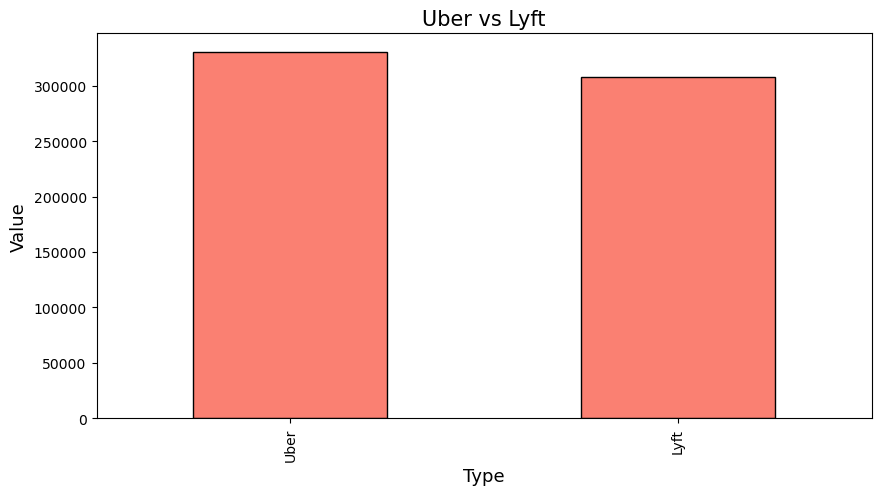

In [35]:
df.cab_type.value_counts().plot(kind='bar', figsize=(10,5), color='salmon', edgecolor='black')
plt.title('Uber vs Lyft', size=15)
plt.xlabel('Type', size=13)
plt.ylabel('Value', size=13)
plt.show()

Berdasarkan bar plot, dapat diketahui bahwa pelanggan lebih banyak memesan taksi jenis Uber dibandingkan dengan taksi jenis Lyft.

Untuk mengetahui jenis/tipe mobil manakah yang sering dipesan oleh pelanggan, dapat digunakan fungsi `.value_counts()` untuk menghitung total jumlah pemesanan setiap jenis/tipe mobil. Fungsi `.sort_values(ascending=True)` digunakan untuk mengurutkan value dari total jumlah pemesanan setiap jenis/tipe mobil dari yang paling sedikit ke paling banyak.

In [36]:
df_name = df.name.value_counts()
df_name = df_name.sort_values(ascending=True)
df_name

Shared          51233
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
UberPool        55091
UberX           55094
Black           55095
UberXL          55096
WAV             55096
Black SUV       55096
Name: name, dtype: int64

Hasil yang didapatkan dapat divisualisasikan menggunakan bar plot atau diagram batang menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

- `kind='bar' `: mendefinisikan jenis plot yang digunakan yaitu bar plot
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

- `plt.title()` : memberi judul pada plot
- `plt.xlabel()` : memberi keterangan pada sumbu X
- `plt.ylable()` : memberi keterangan pada sumbu Y
- `size= ` : mengatur ukuran

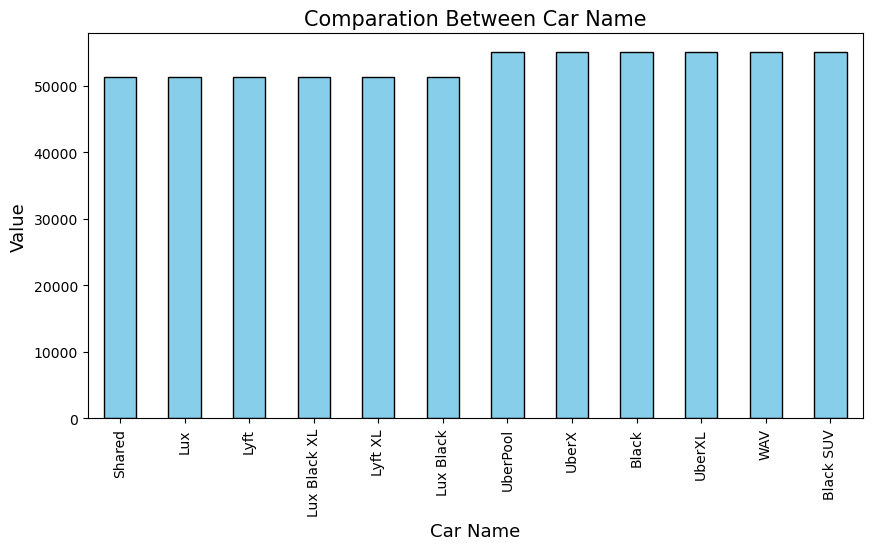

In [37]:
df_name.plot(kind='bar', figsize=(10,5), color='skyblue', edgecolor='black')
plt.title('Comparation Between Car Name', size=15)
plt.xlabel('Car Name', size=13)
plt.ylabel('Value', size=13)
plt.show()

Berdasarkan bar plot, dapat diketahui bahwa mobil jenis Shared adalah jenis mobil yang paling sedikit dipesan oleh pelanggan. Sedangkan mobil jenis Black SUV adalah jenis mobil yang paling banyak dipesan oleh pelanggan.

Informasi mengenai statistik deskriptif dari set data dapat diketahui menggunakan fungsi `.describe()`. Informasi yang diperoleh adalah ringkasan mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data.

In [38]:
df.describe()

,surge_multiplier,hour,distance,visibility,temperature,windSpeed,price
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,1.015068,11.618528,2.189261,8.469180,39.582406,6.186795,16.545125
std,0.095422,6.948776,1.135413,2.601828,6.725500,3.147856,9.324359
min,1.000000,0.000000,0.020000,0.717000,18.910000,0.450000,2.500000
25%,1.000000,6.000000,1.270000,8.432000,36.450000,3.410000,9.000000
50%,1.000000,12.000000,2.160000,9.880000,40.490000,5.910000,13.500000
75%,1.000000,18.000000,2.930000,9.996000,43.580000,8.410000,22.500000
max,3.000000,23.000000,7.860000,10.000000,57.220000,15.000000,97.500000


Berdasarkan informasi mengenai statistik deskriptif, dapat diketahui:
- Rata-rata pelanggan melakukan perjalanan sejauh 1.135413 (satuan jarak)
- Rata-rata biaya yang harus dibayarkan pelanggan dalam satu kali perjalanan adalah 9.324359 USD
- Rata-rata pelanggan memesan taksi pada pukul 11:00 hingga 12:00

Untuk mengetahui berapa biaya price/distance pada setiap jenis mobil perlu dilakukan groupby pada dataframe df berdasarkan kolom name. Kemudian dilakukan penambahan kolom baru pada dataframe yang berisikan nilai dari value pada kolom price dibagi dengan value pada kolom distance.

In [39]:
df_name_2 = df.groupby('name').sum()
df_name_2['price/distance'] = df_name_2['price'] / df_name_2['distance']
df_name_2

,surge_multiplier,hour,distance,visibility,temperature,windSpeed,price,price/distance
name,,,,,,,,
Black,55095.00,638511,120735.12,466217.980,2180262.83,341673.98,1130758.00,9.365610
Black SUV,55096.00,639609,120736.15,466001.437,2182417.11,342100.28,1668679.50,13.820877
Lux,53139.75,595609,112049.32,434002.577,2028621.06,315847.94,910509.50,8.125971
Lux Black,53139.75,596003,112049.32,434627.181,2027089.81,316100.02,1181605.55,10.545406
Lux Black XL,53139.75,595410,112049.32,434134.555,2029360.84,315762.29,1656124.55,14.780318
Lyft,53184.25,598258,112049.32,434605.537,2029201.86,315705.01,492413.68,4.394616
Lyft XL,53184.25,594826,112049.32,433435.992,2029388.71,317717.61,784375.20,7.000267
Shared,51233.00,594717,112047.19,434132.165,2028582.98,317298.91,308929.50,2.757137
UberPool,55091.00,640234,120726.22,466271.210,2180220.70,341206.37,482184.00,3.994029


Hasil yang didapatkan diurutkan menggunakan fungsi `.sort_values()` dari nilai yang terkecil hingga terbesar kemudian divisualisasikan menggunakan bar plot atau diagram batang menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

- `kind='bar' `: mendefinisikan jenis plot yang digunakan yaitu bar plot
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

- `plt.title()` : memberi judul pada plot
- `plt.xlabel()` : memberi keterangan pada sumbu X
- `plt.ylable()` : memberi keterangan pada sumbu Y
- `size= ` : mengatur ukuran

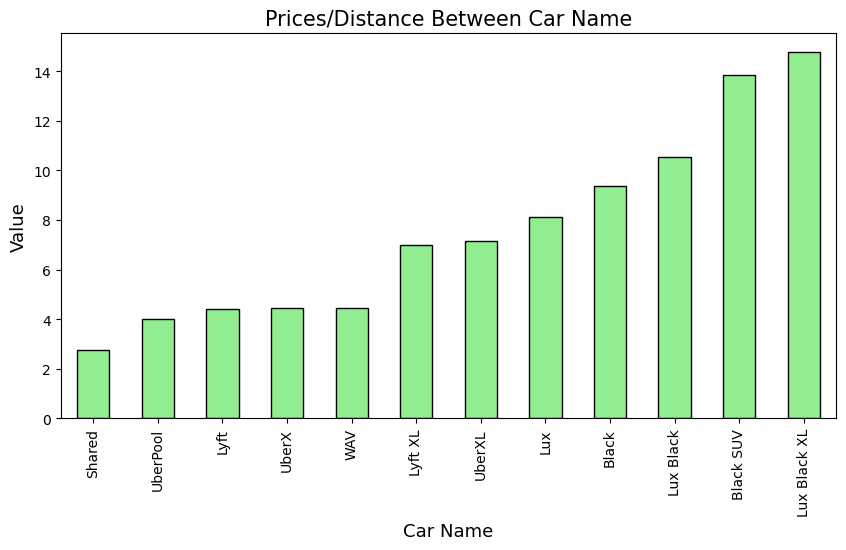

In [40]:
df_name_2['price/distance'].sort_values(ascending=True).plot(kind='bar',figsize=(10,5), color='lightgreen', edgecolor='black')
plt.title('Prices/Distance Between Car Name',size=15)
plt.xlabel('Car Name',size=13)
plt.ylabel('Value',size=13)
plt.show()

Berdasarkan plot, dapat diketahui bahwa biaya price/distance jenis mobil Shared adalah yang paling terjangkau. Sedangkan mobil jenis Lux Black XL memiliki biaya price/distance termahal.

Pengecekan terhadap outlier pada set data dapat dilakukan menggunakan box plot atau diagram kotak garis menggunakan fungsi `.plot()` dengan parameter `kind='box'` yaitu untuk mendefinisikan plot sebagai box plot dan parameter `figsize=()` untuk mendefinisikan ukuran dari plot yang akan dibuat.

<AxesSubplot:>

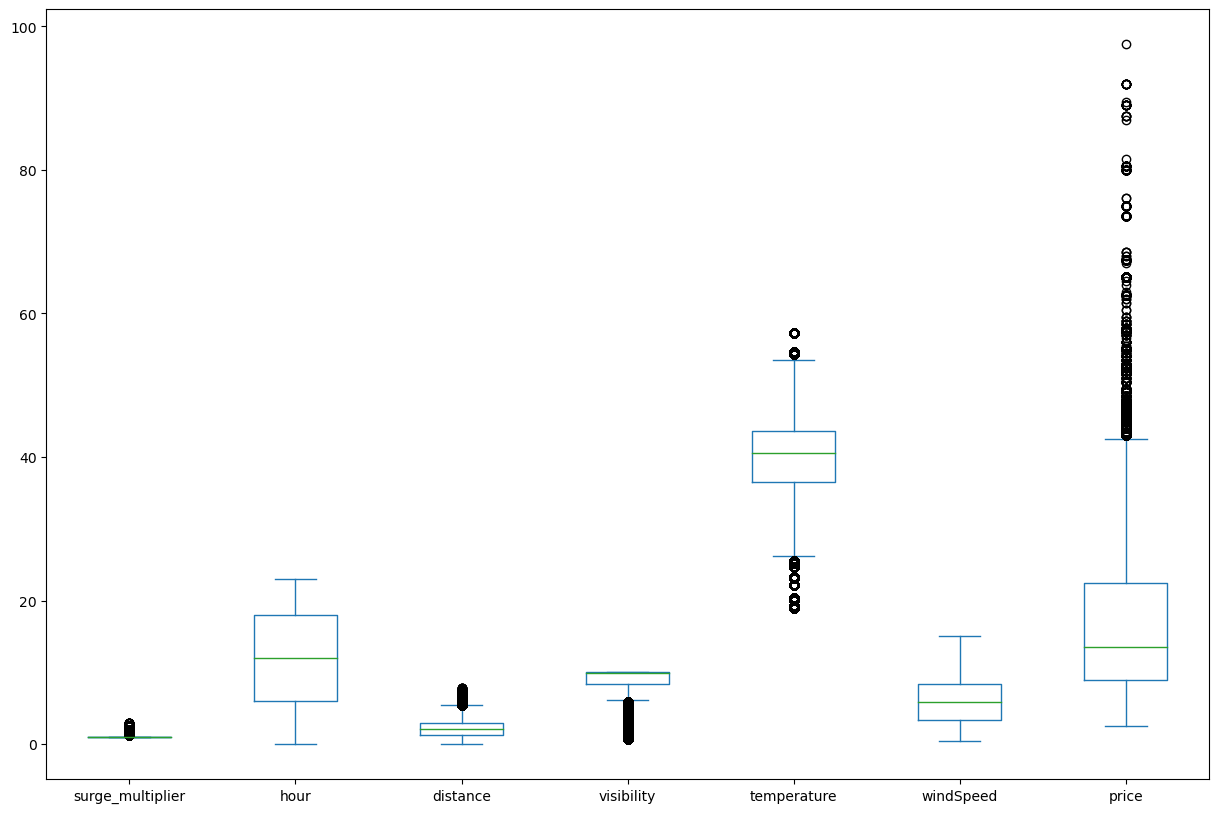

In [41]:
df.plot(kind='box',figsize=(15,10))

Berdasarkan box plot, ditemukan outlier pada beberapa kolom yaitu **surge_multiplier**, **distance**, **visibility**, **temperature**, dan **price**. Sedangkan pada kolom **hour** dan **windSpeed** tidak ditemukan outlier.

Sebaran pada data label dapat diketahui melalui histogram atau plot distribusi peluang.

Histogram didapatkan menggunakan fungsi `.plot()` dengan parameter yang disesuaikan. 

- `kind='hist' `: mendefinisikan jenis plot yang digunakan yaitu histogram
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

<AxesSubplot:ylabel='Frequency'>

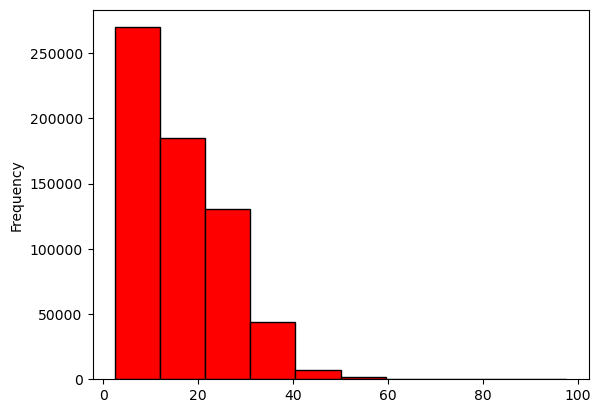

In [42]:
df['price'].plot(kind='hist',color='red',edgecolor='black')

Sedangkan plot distribusi peluang didapatkan menggunakan fungsi `sns.displot()` dengan parameter `df['price']` yaitu kolom data label.

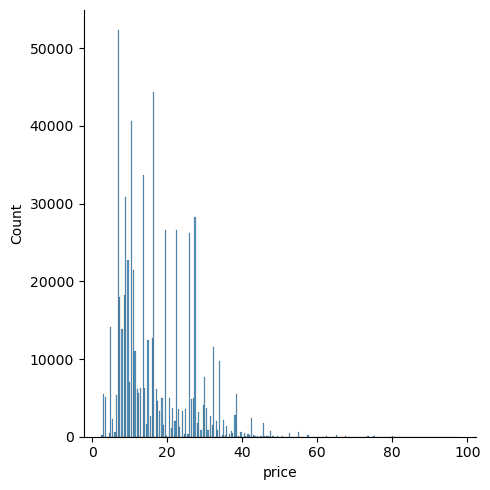

In [43]:
sns.displot(df['price'])

Berdasarkan histogram dan plot distribusi peluang, keduanya sama-sama menunjukkan adanya kecenderungan distribusi data yang miring ke kanan.

Korelasi antar kolom pada set data dapat diketahui menggunakan fungsi `.corr()`.

In [44]:
df.corr()

,surge_multiplier,hour,distance,visibility,temperature,windSpeed,price
surge_multiplier,1.000000,-0.000067,0.025946,0.001716,-0.001594,0.002593,0.240458
hour,-0.000067,1.000000,0.002283,0.173776,0.218829,0.073011,0.000561
distance,0.025946,0.002283,1.000000,0.004143,-0.002738,0.001709,0.345061
visibility,0.001716,0.173776,0.004143,1.000000,-0.324158,-0.035550,0.001497
temperature,-0.001594,0.218829,-0.002738,-0.324158,1.000000,0.058846,-0.000084
windSpeed,0.002593,0.073011,0.001709,-0.035550,0.058846,1.000000,0.000990
price,0.240458,0.000561,0.345061,0.001497,-0.000084,0.000990,1.000000


Jika ingin diketahui visualisasi dari korelasi antar kolom, maka dapat digunakan plot jenis heatmap yang didapatkan menggunakan fungsi `sns.heatmap()`.

<AxesSubplot:>

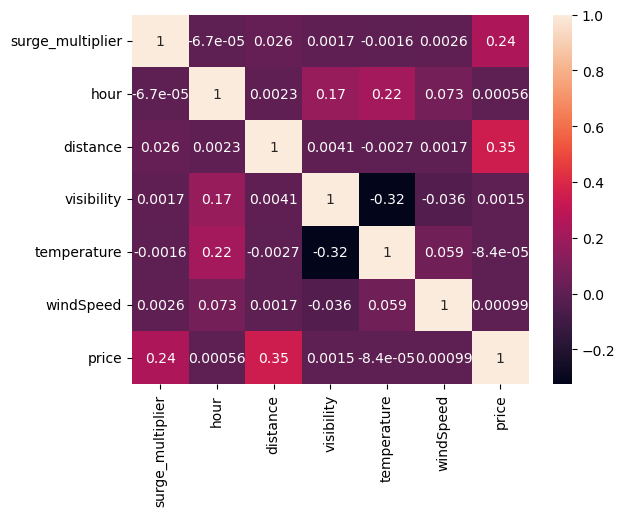

In [45]:
sns.heatmap(df.corr(),annot=True)

Dapat diketahui bahwa korelasi antar kolom pada set data sangat kecil dan bernilai mendekati nol. Korelasi paling besar ditemukan pada kolom price dengan kolom distance dengan korelasi sebesar 0.35 dan kolom temperature dengan kolom visibility sebesar -0.32.

# Pre-Processing Data

## Encode Data

Proses Encoding dilakukan untuk memetakan setiap data kategorik pada dataset menjadi sebuah angka.

Pada kolom `cab_type` dilakukan encoding dengan jenis one hot encoding dimana pada setiap data kategori unik dijadikan kolom baru.

In [46]:
cols = ['cab_type']
df = pd.get_dummies(df, columns = cols)
df

,name,surge_multiplier,hour,distance,visibility,temperature,windSpeed,price,cab_type_Lyft,cab_type_Uber
0,Shared,1.0,9,0.44,10.000,42.34,8.66,5.0,1,0
1,Lux,1.0,2,0.44,4.786,43.58,11.98,11.0,1,0
2,Lyft,1.0,1,0.44,10.000,38.33,7.33,7.0,1,0
3,Lux Black XL,1.0,4,0.44,10.000,34.38,5.28,26.0,1,0
4,Lyft XL,1.0,3,0.44,10.000,37.44,9.14,9.0,1,0
...,...,...,...,...,...,...,...,...,...,...
693065,WAV,1.0,23,1.00,9.785,37.05,2.34,9.5,0,1
693066,UberXL,1.0,23,1.00,9.785,37.05,2.34,13.0,0,1
693067,UberX,1.0,23,1.00,9.785,37.05,2.34,9.5,0,1
693069,Black SUV,1.0,23,1.00,9.785,37.05,2.34,27.0,0,1


Sedangkan pada kolom `name` dilakukan encoding dengan jenis ordinal encoding yaitu memetakan setiap data kategorik pada dataset menjadi sebuah angka secara urut dimana urutan ditentukan berdasarkan kualitas dari kategori.

In [47]:
df['name'].replace({'Shared':1,'UberPool':2,'Lyft':3,'UberX':4,'UberXL':5,'WAV':6,'Lyft XL':7,'Lux':8,'Black':9,'Lux Black':10,'Lux Black XL':11,'Black SUV':12},inplace=True)

## Splitting Data

Splitting data dilakukan untuk membagi data menjadi 2 set/bagian yaitu training set dan test set. Pembagian data training dan data testing dilakukan secara acak. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model. Sebelum dilakukan proses splitting data, masing-masing data feature dan data label perlu didefinisikan terlebih dahulu.

* X : data feature (variabel independen)
* y : data label (variabel dependen)



In [48]:
X = df.drop('price',axis=1)
y = df['price']

Proses splitting data dapat menggunakan fungsi `train_test_split()` dengan parameter:

- X : data feature
- y : data label
- test_size : ukuran test data yaitu 30%
- random_state : digunakan agar saat proses running ulang data tidak berubah-ubah

Proporsi test data umumnya bernilai 20% atau 30% sesuai dengan kebutuhan. Ukuran train data harus lebih besar daripada ukuran test data karena apabila ukuran train data terlalu kecil maka model tidak akan belajar.

In [49]:
# train 70%, test 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Banyaknya data pada masing masing set dapat diketahui menggunakan fungsi `len()`.

In [50]:
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))
print('Training\t\t: {0:0.02f}% ada pada dataset'.format((len(X_train)/len(df.name)) * 100))
print('Test\t\t\t: {0:0.02f}% ada pada dataset'.format((len(X_test)/len(df.name)) * 100))

Training dataset	: 446583
Testing dataset		: 191393
Training		: 70.00% ada pada dataset
Test			: 30.00% ada pada dataset


# Pendefinisian Model

## Linear Regression

Model linear regression terdiri dari satu atau lebih variabel independen (X) dan memiliki satu variabel dependen (y). Tujuan dari model ini adalah untuk menemukan hubungan linier yang terbaik antara variabel dependen dan variabel independen dengan menggunakan koefisien regresi yang optimal.
1. Sederhana dan Mudah Dipahami : karena hanya melibatkan hubungan liniear antara variabel dependen dan variabel independen
2. Komputasi Cepat: hanya melibatkan operasi matematika dasar
3. Interpretasi Variabel: koefisien regresi pada model Linear Regression dapat diinterpretasikan dengan mudah dan dapat memberikan informasi tentang seberapa besar pengaruh dari setiap variabel
4. Prediksi Akurat: jika model Linear Regression sudah sesuai dengan data yang ada, maka model ini dapat memberikan prediksi yang cukup akurat

In [51]:
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=True)

`fit_intercept(True)` untuk menambahkan nilai intercept, yang sangat penting dalam model Linear Regression karena jika tidak termasuk dalam model, maka garis regresi akan selalu melewati titik koordinat (0,0).

`copy_X(true) `jika dataset yang digunakan cukup besar, disarankan untuk mengatur nilai copy_X menjadi True, sehingga data yang diolah oleh model tidak mengganggu dataset yang asli.

`n_jobs(None)` nilai n_jobs hanya efektif jika dataset yang digunakan cukup besar, dan jumlah core pada komputer yang digunakan juga mencukupi. Jika dataset yang digunakan tidak terlalu besar, atau jumlah core pada komputer tidak cukup, penggunaan nilai n_jobs yang terlalu besar justru dapat membuat proses training model menjadi lebih lambat.

`positive(true)` karena semua nilai dari variabel harus bernilai positive

## XG Boost Regressor

XGBoost (Extreme Gradient Boosting) Regression adalah jenis model regresi yang dikembangkan menggunakan ekstensi dari model pohon keputusan yang ditingkatkan dengan teknik boosting.

Model XGBoost Regresi memanfaatkan teknik pembelajaran mesin yang kuat dan dapat digunakan untuk memprediksi variabel target yang kontinu (numerik). 

XGBoost menggabungkan beberapa model pohon keputusan yang lemah untuk membentuk model yang lebih kuat. Setiap pohon keputusan dibangun dengan mempertimbangkan residual (selisih antara nilai prediksi model saat ini dan nilai target yang sebenarnya) dari model sebelumnya. Dengan cara ini, model XGBoost dapat memperbaiki prediksi pada setiap iterasi.

1. Akurai yang Tinggi: menggunakan teknik ensemble learning dengan memadukan beberapa model pohon keputusan untuk membuat model yang lebih akurat dan stabil.
2. Skalabilitas : dapat dengan mudah menangani data yang sangat besar dan kompleks dengan fitur yang banyak. Model ini mendukung parallel processing yang mempercepat waktu pelatihan model.
3. Penanganan Missing Values: dapat menangani nilai yang hilang dalam data dan memungkinkan penggunaan data yang tidak lengkap.

4. Regularisasi: membantu mencegah overfitting dan menghasilkan model yang lebih umum.

5. Interpretasi: pengguna dapat memahami faktor apa yang paling mempengaruhi target.

In [52]:
xgb_r = xg.XGBRegressor(objective='reg:linear',n_estimators = 11, seed = 123)

`objective(reg:linear)` artinya fungsi objektif yang digunakan adalah Mean Squared Error(MSE). Tujuannya adalah untuk meminimalkan MSE dengan menemukan bobot yang optimal untuk setiap pohon keputusan. Cocok untuk masalah regresi dimana targetnya adalah numerik dan kontinu

`n_estimators(11)` menentukan jumlah pohon keputusan yang dibuat dalam model. Semakin banyak pohon, semakin kompleks, dan semakin akurat, namun dapat menyebabkan overfitting dan membutuhkan waktu dalam melatih model. nilai 11 mejadi nilai yang lebih akurat dibandingkan nilai 10 yang sebelumnya digunakan.

`seed(123)` merupakan nilai awal untuk menginisiasi generator bilangan acak. menentukan nilai seed untuk memastikan bahwa dalam tiap eksekusi hasilnya akan konsisten, jika tidak diatur makan hasil bisa saja berbeda-beda setiap dieksekusi

## Random Forest Regressor

Random Forest Regressor adalah salah satu jenis algoritma Machine Learning yang digunakan untuk melakukan prediksi nilai numerik atau kontinu berdasarkan fitur atau atribut lainnya. Model ini menggabungkan banyak pohon keputusan (decision trees) ke dalam satu model yang lebih besar. Setiap pohon keputusan dalam model random forest dihasilkan secara acak dan independen satu sama lain.

Dalam model random forest regressor, setiap pohon keputusan memiliki bobot yang sama pentingnya, sehingga prediksi akhir didapatkan dari hasil penggabungan semua pohon keputusan. Model ini dapat digunakan untuk memprediksi nilai numerik, seperti harga rumah, suhu, atau penghasilan berdasarkan fitur atau atribut lainnya.

1. Mampu menangani data yang kompleks: Model ini dapat menangani dataset dengan banyak fitur dan pola yang kompleks. 

2. Tidak sensitif terhadap overfitting: Model ini dapat menghindari overfitting pada data yang digunakan karena setiap pohon keputusan dihasilkan secara acak dan independen satu sama lain.

3. Mudah diimplementasikan: Model ini mudah diimplementasikan dan cepat dalam proses pelatihan dan pengujian. Juga tidak memerlukan banyak tuning parameter seperti pada model lainnya.

4. Stabil dan akurat: Model ini dapat memberikan hasil prediksi yang stabil dan akurat pada data yang belum pernah dilihat sebelumnya. Sehingga model ini dapat diandalkan dalam membuat prediksi nilai numerik atau kontinu pada data baru.

In [53]:
rf_r = RandomForestRegressor(max_depth = 10,random_state=33)

`n_estimators` tidak didefenisikan  untuk membuat hasil paling maksimal dari pohon keputusan,yang merupakan penentu jumlah pohon keputusan dalam model

`max_depth (10)` untuk membatasi kedalaman maksimum setiap pohon keputusan, semakin dalam semakin komplek dan lama dalam pelatihan model. Setelah dilakukan percobaan, nilai diatas sepuluh menyebabkan prediksi menghasilkan data yang bersifat overfitting.

`random_state(33)` untuk memastikan pohon keputusan yang dihasilkan pada setiap pelatihan model akan selalu sama dan memudahkan dalam melakukan evaluasi dan debugging model

# Pelatihan Model

## Linear Regression

In [54]:
model = lr.fit(X_train, y_train)
y_pred_lr_train=model.predict(X_train)
y_pred_lr_test=model.predict(X_test)

Melatih model Linear Regression dengan variabel independen X_train, dan variabel independen y_train
Kemudian melakukan prediksi terhadap variabel independen X_test

In [55]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_pred_lr_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
195683,11.0,15.686446,-4.686446
11612,27.5,27.538616,-0.038616
405687,19.5,22.134016,-2.634016
27359,17.0,21.475077,-4.475077
467781,9.0,10.641264,-1.641264
576712,7.0,1.834239,5.165761
424618,8.0,7.460493,0.539507
91185,15.0,13.247802,1.752198
472760,10.5,9.291118,1.208882
543109,32.5,26.562479,5.937521


Menggunakan Data Frame untuk melihat 10 hasil output prediksi dari data X_train yang digunakan untuk membuat model prediksi tersebut. Ditunjukkan bahwa hasil memiliki perbedaan nilai yang cukup signifikan pada beberapa prediksi, dengan beberapa nilai cukup mendekati nilai real price dari data y_train

In [56]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_pred_lr_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
677566,19.5,22.200838,-2.700838
308691,10.5,8.743591,1.756409
396241,5.0,6.492542,-1.492542
136589,16.5,19.497155,-2.997155
198998,38.5,28.117429,10.382571
179736,16.5,18.686790,-2.186790
311934,30.5,26.247775,4.252225
510750,19.5,21.897129,-2.397129
6135,13.5,15.104214,-1.604214
313476,10.5,16.436945,-5.936945


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi sedikit berbeda dengan nilai price asli. Namun beberapa cukup mendekati nilai price aslinya.

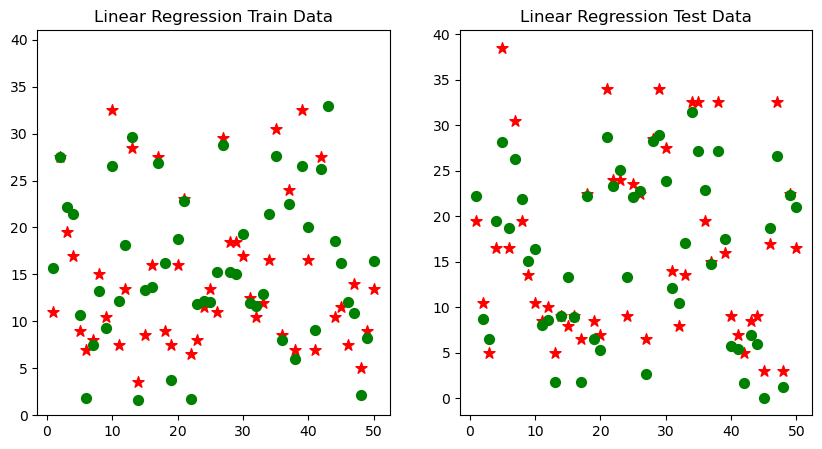

In [57]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_pred_lr_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('Linear Regression Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_pred_lr_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('Linear Regression Test Data')

#menampilkan plot
plt.show()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_train dan X_test. 
Kemudian dibandingkan dengan nilai price real dari y_train dan y_test. 

Menunjukkan hasil prediksi pada data train data didominasi oleh data yang mendekati nilai real dan sangat sedikit data yang berbeda namun tidak terlalu jauh.

Pada data test, didominasi juga oleh data yang mendekati nilai real, tetapi terdapat beberapa yang perbedaannya cukup signifikan

## XG Boost

In [58]:
model = xgb_r.fit(X_train, y_train)
y_pred_xgb_train = model.predict(X_train)
y_pred_xgb_test = model.predict(X_test)

[14:48:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


Melatih model XG Boost Regressor dengan variabel independen X_train, dan variabel independen y_train
Kemudian melakukan prediksi terhadap variabel independen X_test

In [59]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_pred_xgb_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
195683,11.0,10.962972,0.037028
11612,27.5,26.961906,0.538094
405687,19.5,20.027206,-0.527206
27359,17.0,13.293572,3.706428
467781,9.0,7.362426,1.637574
576712,7.0,6.395574,0.604426
424618,8.0,9.295434,-1.295434
91185,15.0,16.167936,-1.167936
472760,10.5,8.949859,1.550141
543109,32.5,26.111799,6.388201


Menggunakan Data Frame untuk melihat 10 hasil output prediksi dari data X_train yang merupakan data untuk membuat prediksi tersebut. Kemudian dibandingkan dengan nilai price real dari y_train, yang menunjukkan hasil prediksi yang cukup dekat dengan nilai aslinya, Namun terdapat beberapa nilai prediksi yang memiiki selisih cukup besar.

In [60]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_pred_xgb_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
677566,19.5,20.882133,-1.382133
308691,10.5,11.052687,-0.552687
396241,5.0,6.844829,-1.844829
136589,16.5,16.645100,-0.145100
198998,38.5,32.341320,6.158680
179736,16.5,16.039398,0.460602
311934,30.5,26.941254,3.558746
510750,19.5,20.027206,-0.527206
6135,13.5,11.297630,2.202370
313476,10.5,12.156940,-1.656940


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi yang cukup dekat dengan nilai aslinya. Hanya beberapa nilai prediksi yang berbeda cukup besar

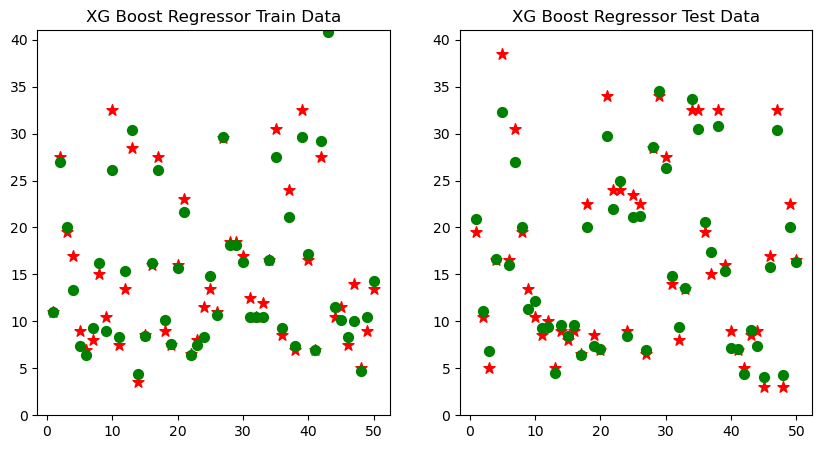

In [61]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_pred_xgb_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('XG Boost Regressor Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_pred_xgb_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('XG Boost Regressor Test Data')
ax2.set_ylim([0,41])
#menampilkan plot
plt.show()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_train dan X_test. 
Kemudian dibandingkan dengan nilai price real dari y_train dan y_test. 

Menunjukkan hasil prediksi pada data train didominasi oleh data yang sangat mendekati nilai real dan perbedaan data tidak jauh.

Pada data test, didominasi juga oleh data yang sangat mendekati nilai real, dengan beberapa data yang perbedaan tidak jauh dari nilai asli.

## Random Forest Regressor

In [62]:
model = rf_r.fit(X_train, y_train)
y_pred_rf_train = model.predict(X_train)
y_pred_rf_test = model.predict(X_test)

Melatih model XG Boost Regressor dengan variabel independen X_train, dan variabel independen y_train
Kemudian melakukan prediksi terhadap variabel independen X_test

In [63]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_pred_rf_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
195683,11.0,11.246551,-0.246551
11612,27.5,27.940954,-0.440954
405687,19.5,20.468894,-0.968894
27359,17.0,13.331710,3.668290
467781,9.0,7.786878,1.213122
576712,7.0,6.429212,0.570788
424618,8.0,9.609204,-1.609204
91185,15.0,17.357140,-2.357140
472760,10.5,9.195037,1.304963
543109,32.5,26.532526,5.967474


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_train yang digunakan untuk membuat prediksi, kemudian dibandingkan dengan nilai price real dari y_train, yang menunjukkan hasil nilai prediksi yang sangat dekat dengan nilai aslinya, Tetapi terdapat nilai yang memiliki selisih yang cukup besar

In [64]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_pred_rf_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
677566,19.5,22.075700,-2.575700
308691,10.5,11.157726,-0.657726
396241,5.0,6.901677,-1.901677
136589,16.5,17.172468,-0.672468
198998,38.5,33.808458,4.691542
179736,16.5,16.495523,0.004477
311934,30.5,28.294961,2.205039
510750,19.5,20.456903,-0.956903
6135,13.5,11.808418,1.691582
313476,10.5,12.585738,-2.085738


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil nilai prediksi yang sangat mendekati dengan nilai aslinya, terdapat beberapa nilai yang memiliki perbedaan namun tidak terlalu besar.

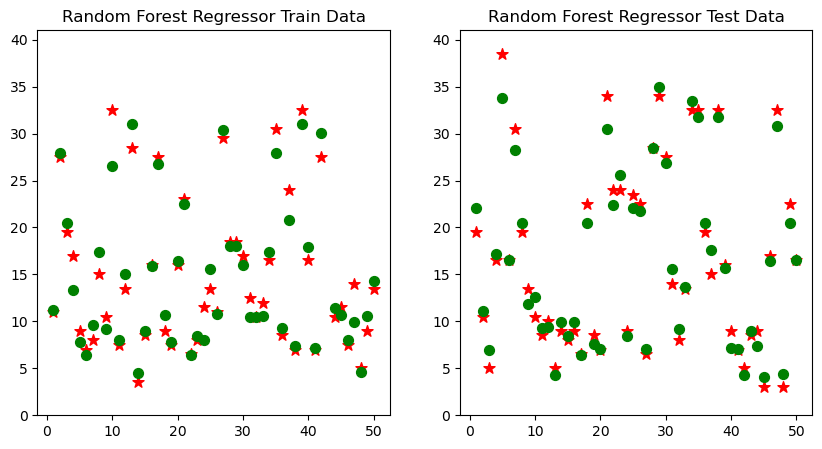

In [65]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_pred_rf_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('Random Forest Regressor Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_pred_rf_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('Random Forest Regressor Test Data')
ax2.set_ylim([0,41])
#menampilkan plot
plt.show()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_train dan X_test. 
Kemudian dibandingkan dengan nilai price real dari y_train dan y_test. 

Menunjukkan hasil prediksi pada data train didominasi oleh data yang sangat mendekati nilai real dan hanya sedikit nilai yang berbeda dengan selisih yang cukup kecil

Pada data test, didominasi juga oleh data yang sangat mendekati nilai real, dengan dan hanya sedikit nilai yang berbeda dengan selisih yang cukup kecil.

# Evaluasi Model

## Linear Regression

In [66]:
print('test',y_pred_lr_test)
print('train', y_pred_lr_train)

test [22.20083792  8.74359104  6.49254155 ... 41.13911606 21.86509537
 19.74138705]
train [15.68644589 27.53861594 22.13401558 ... 25.23354416 19.29232157
 -0.20396044]


In [67]:
print('slope :',lr.coef_)
print('intercept :',lr.intercept_)

slope : [2.20168198e+00 1.77760341e+01 0.00000000e+00 2.79960227e+00
 3.08661466e-03 2.63218795e-04 8.02041009e-04 2.76799649e-01
 0.00000000e+00]
intercept : -22.09813578589416


In [68]:
print('Rumus dari Model Linear Regression adalah :\ny =',lr.coef_[0],'X1 +', lr.coef_[1], 'X2 +', lr.coef_[2], 'X3 +', lr.coef_[3], 'X4 +', lr.coef_[4], 'X5 +', lr.coef_[5], 'X6 +', lr.coef_[6], 'X7 +',lr.coef_[7], 'X8 +', lr.coef_[8], 'X9', lr.intercept_)

Rumus dari Model Linear Regression adalah :
y = 2.2016819846699707 X1 + 17.776034105377057 X2 + 0.0 X3 + 2.7996022688551467 X4 + 0.003086614655898477 X5 + 0.0002632187950389614 X6 + 0.000802041008815815 X7 + 0.27679964878283786 X8 + 0.0 X9 -22.09813578589416


In [69]:
X_train.columns

Index(['name', 'surge_multiplier', 'hour', 'distance', 'visibility',
       'temperature', 'windSpeed', 'cab_type_Lyft', 'cab_type_Uber'],
      dtype='object')

In [70]:
print('R^2 score data train model Linear Regression adalah :',r2_score(y_train, y_pred_lr_train))
print('R^2 score data test model Linear Regression adalah :',r2_score(y_test, y_pred_lr_test))
print('-------------------------------------------------------------------------')
mse_train = mean_squared_error(y_test,y_pred_lr_test)
mse_test = mean_squared_error(y_train,y_pred_lr_train)
rootmeansq_train = np.sqrt(mse_train)
rootmeansq_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_lr_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_lr_test)
print('MSE data train model Linear Regression :',mse_train)
print('MSE data test model Linear Regression :',mse_test)
print('-------------------------------------------------------------------------')
print('RMSE data train model Linear Regression :', rootmeansq_train)
print('RMSE data test model Linear Regression :', rootmeansq_test)
print('-------------------------------------------------------------------------')
print('MAPE data train model Linear Regression :', mape_train)
print('MAPE data test model Linear Regression :', mape_test)

R^2 score data train model Linear Regression adalah : 0.8327440163476412
R^2 score data test model Linear Regression adalah : 0.8347584961023765
-------------------------------------------------------------------------
MSE data train model Linear Regression : 14.253813556569973
MSE data test model Linear Regression : 14.590698693016826
-------------------------------------------------------------------------
RMSE data train model Linear Regression : 3.775422301752477
RMSE data test model Linear Regression : 3.819777309348914
-------------------------------------------------------------------------
MAPE data train model Linear Regression : 0.23291365723446883
MAPE data test model Linear Regression : 0.23227493499867155


- R^2 score mewakili koefisien memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Nilai dari 0 sampai 1 diartikan sebagai persentase, semakin tinggi nilainya, semakin baik modelnya.
Terlihat hasil dari R^2 Score data test model Liner Regression tersebut dengan menggunakan R^2 score didapatkan sebesar 0.83475.
Dapat Disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih R^2 score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.


- Dengan melihat nilai MSE data test dari model Linear Regression sebesar 14.5906 yang berarti terdapat kesalahan sebesar 14.5906 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut cukup besar yang berarti tingkat error dalam memprediksi juga cukup besar. Dapat dilihat dari selisih nilai MSE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.


- Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari RMSE data test model Linear Regression didapat RMSE sebesar 3.8197, nilai RMSE tersebut cukup besar yang berarti tingkat error dalam memprediksi juga cukup besar.


- Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE data test model Linear Regression sebesar 0.2322 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 23% yang mana nilai ini cukup besar. Terlihat juga dari selisih nilai MAPE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.

## XGBoost

In [71]:
print('test',y_pred_xgb_test)
print('train', y_pred_xgb_train)

test [20.882133  11.052687   6.8448286 ... 41.213573  26.36546   16.696533 ]
train [10.962972  26.961906  20.027206  ... 22.91534   15.902607   4.0825768]


In [72]:
print('R^2 score data train model XGBoost adalah :',r2_score(y_train, y_pred_xgb_train))
print('R^2 score data test model XGBoost adalah :',r2_score(y_test, y_pred_xgb_test))
print('-------------------------------------------------------------------------')
mse_train = mean_squared_error(y_test,y_pred_xgb_test)
mse_test = mean_squared_error(y_train,y_pred_xgb_train)
rootmeansq_train = np.sqrt(mse_train)
rootmeansq_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_xgb_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_xgb_test)
print('MSE data train model XGBoost :',mse_train)
print('MSE data test model XGBoost :',mse_test)
print('-------------------------------------------------------------------------')
print('RMSE data train model XGBoost :', rootmeansq_train)
print('RMSE data test model XGBoost :', rootmeansq_test)
print('-------------------------------------------------------------------------')
print('MAPE data train model XGBoost :', mape_train)
print('MAPE data test model XGBoost :', mape_test)

R^2 score data train model XGBoost adalah : 0.9612929353501829
R^2 score data test model XGBoost adalah : 0.9617083510954731
-------------------------------------------------------------------------
MSE data train model XGBoost : 3.303056504477939
MSE data test model XGBoost : 3.376639240425996
-------------------------------------------------------------------------
RMSE data train model XGBoost : 1.8174312929180951
RMSE data test model XGBoost : 1.8375633976616959
-------------------------------------------------------------------------
MAPE data train model XGBoost : 0.08552809338890517
MAPE data test model XGBoost : 0.08524872831604681


- R^2 score mewakili koefisien memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Nilai dari 0 sampai 1 diartikan sebagai persentase, semakin tinggi nilainya, semakin baik modelnya.
Terlihat hasil dari R^2 score data test model XGBoost tersebut dengan menggunakan R^2 score didapatkan sebesar 0.96170.
Dapat Disimpulkan bahwa model tersebut sudah baik dalam memprediksi data. Juga dapat dilihat dari selisih R^2 score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.


- Dengan melihat nilai MSE dari data test model XGBoost sebesar 3.3766 yang berarti terdapat kesalahan sebesar 3.3766 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga kecil, yang artinya model tersebut sudah baik dalam memprediksi serta error dalam memprediksi juga cukup kecil. Dapat dilihat dari selisih nilai MSE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.


- Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari model XGBoost didapat RMSE sebesar 1.8375, nilai RMSE tersebut sudah kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga kecil.


- Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE model data test XGBoost sebesar 0.08524 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 8% yang mana nilai tersebut cukup kecil, sehingga model tersebut sudah baik dalam memprediksi. Terlihat juga dari selisih nilai MSE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.

## Random Forest

In [73]:
print('test',y_pred_rf_test)
print('train', y_pred_rf_train)

test [22.07570004 11.15772608  6.9016768  ... 43.1497095  26.79461991
 16.97673636]
train [11.24655143 27.94095378 20.46889396 ... 23.80176017 17.19868162
  4.06277877]


In [74]:
print('R^2 score data train model Random Forest adalah :',r2_score(y_train, y_pred_rf_train))
print('R^2 score data test model Random Forest adalah :',r2_score(y_test, y_pred_rf_test))
print('-------------------------------------------------------------------------')
mse_train = mean_squared_error(y_test,y_pred_rf_test)
mse_test = mean_squared_error(y_train,y_pred_rf_train)
rootmeansq_train = np.sqrt(mse_train)
rootmeansq_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_rf_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_rf_test)
print('MSE data train model Random Forest :',mse_train)
print('MSE data test model Random Forest :',mse_test)
print('-------------------------------------------------------------------------')
print('RMSE data train model Random Forest :', rootmeansq_train)
print('RMSE data test model Random Forest :', rootmeansq_test)
print('-------------------------------------------------------------------------')
print('MAPE data train model Random Forest :', mape_train)
print('MAPE data test model Random Forest :', mape_test)

R^2 score data train model Random Forest adalah : 0.9653299538374907
R^2 score data test model Random Forest adalah : 0.9645011769545301
-------------------------------------------------------------------------
MSE data train model Random Forest : 3.0621459695821267
MSE data test model Random Forest : 3.0244669648506415
-------------------------------------------------------------------------
RMSE data train model Random Forest : 1.7498988455285427
RMSE data test model Random Forest : 1.739099469510195
-------------------------------------------------------------------------
MAPE data train model Random Forest : 0.08471416176147609
MAPE data test model Random Forest : 0.08521378550218216


- R^2 score mewakili koefisien memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Nilai dari 0 sampai 1 diartikan sebagai persentase, semakin tinggi nilainya, semakin baik modelnya. 
Terlihat hasil dari R^2 score data test model Random Forest tersebut dengan menggunakan R^2 score didapatkan sebesar 0.964501.
Dapat Disimpulkan bahwa model tersebut sudah baik dalam memprediksi data. Juga dapat dilihat dari selisih R^2 score data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.


- Dengan melihat nilai MSE dari data test model Random Forest sebesar 3.0244 yang berarti terdapat kesalahan sebesar 3.0244 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut cukup kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga cukup kecil. Dapat dilihat dari selisih nilai MSE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.


- Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari data test model Random Forest didapat RMSE sebesar 1.7390, nilai RMSE tersebut cukup kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga cukup kecil.


- Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE data test model Random Forest sebesar 0.08521 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 8% yang mana nilai tersebut cukup kecil, sehingga model sudah baik dalam memprediksi. Terlihat juga dari selisih nilai MAPE data training dan data testing tidak cukup besar sehingga dapat disimpulkan tidak terjadi overfitting.

## HYPOTHESIS TESTING

**Dengan tingkat kepercayaan sebesar 95%**

**Hipotesis**:

**$H0$** : Rata-rata harga order taksi Uber sama dengan rata-rata harga order taksi Lyft

**$H1$** : Rata-rata harga order taksi Uber tidak sama dengan rata-rata harga order taksi Lyft

**$Alpha : 0.05$**

In [75]:
uber = df[df['cab_type_Uber']==1]
lyft = df[df['cab_type_Lyft']==1]

In [76]:
# Jumlah data, mean, dan standard deviasi
n_uber = len(uber)
mean_uber = uber['price'].mean()
std_uber = uber['price'].std()
print('Jumlah data Uber:',n_uber,'\nMean Uber:',mean_uber,'\nStd Uber:',std_uber)

Jumlah data Uber: 330568 
Mean Uber: 15.795343166912708 
Std Uber: 8.560299982017439


In [77]:
# Jumlah data, mean, dan standard deviasi
n_lyft = len(lyft)
mean_lyft = lyft['price'].mean()
std_lyft = lyft['price'].std()
print('Jumlah data Lyft:',n_lyft,'\nMean Lyft:',mean_lyft,'\nStd Lyft:',std_lyft)

Jumlah data Lyft: 307408 
Mean Lyft: 17.351396125019512 
Std Lyft: 10.019170761821647


In [78]:
# Dengan tingkat kepercayaan sebesar 95% maka alpha = 0.05
alpha = 0.05

In [79]:
price_hypo = sm.stats.ztest(uber['price'].dropna(),
                            lyft['price'].dropna(), 
                            alternative='two-sided')

In [80]:
price_hypo

(-66.83531585586235, 0.0)

In [81]:
if price_hypo[1]>alpha:
    print('Terima Hipotesis nol(H0), Rata-rata harga order taksi Uber sama dengan rata-rata harga order taksi Lyft')
else:
    print('Reject Hipotesis nol(H0), Rata-rata harga order taksi Uber tidak sama dengan rata-rata harga order taksi Lyft')

Reject Hipotesis nol(H0), Rata-rata harga order taksi Uber tidak sama dengan rata-rata harga order taksi Lyft


# Kesimpulan

Berdasarkan hasil analisis diatas, dapat disimpulkan bahwa :
- Data untuk kolom price memiliki distribusi yang tidak normal hal ini terlihat dari distribution plot, sehingga data tidak terdistribusi secara merata dan lebih cendrung ke kanan atau positive skew.


- Dari grafik persebaran data surge multiplier, distance, temprature, dan price terlihat bahwa terdapat data outlier dari grafik tersebut.


- Dari model-model machine learning yang telah diterapkan, diambil kesimpulan bahwa model **Random Forest** merupakan model terbaik untuk memprediksi.
Karena nilai R-Squared Score-nya yang paling besar yaitu 0.964501. Selain itu, nilai MSE serta RMSE atau rata-rata kesalahan nilai antara prediksi dan aktualnya yg kecil sebesar 3.0244 dan 1.73909, dan total presentase kesalahan absolut dari model tersebut dengan menggunakan MAPE yang kecil sebesar 8%. Selain itu selisih antara nilai data train dan data test kecil sehingga tidak terjadi underfitting ataupun overfitting.


- Berdasarkan model linear regression yaitu **y = 2.2016819846699707 X1 + 17.776034105377057 X2 + 0.0 X3 + 2.7996022688551467 X4 + 0.003086614655898477 X5 + 0.0002632187950389614 X6 + 0.000802041008815815 X7 + 0.27679964878283786 X8 + 0.0 X9 -22.098135785894154** terlihat bahwa intercept pada model yang dibuat adalah sekitar - 22.167956321343542, dan variabel yang paling mempengaruhi price dari model tersebut adalah variabel 'surge_multiplier', karena memiliki nilai slope terbesar yaitu 17.77603410537705.


- Dengan menggunakan uji hipotesis untuk mengetahui apakah rata-rata harga order taksi Uber sama dengan rata-rata harga taksi Lyft didapat hasil bahwa **rata-rata harga taksi Uber tidak sama dengan taksi lyft**.


- Didapat hasil bahwa rata-rata harga order taksi Lyft lebih besar daripada rata-rata harga order taksi Lyft yaitu 17.3513 $.


- Untuk meningkatkan pendapatan lebih besar lagi, taksi Uber dan Lyft dapat memaksimalkan variabel surge multiplier yaitu menaikkan tarif order yang lebih tinggi disaat perusahaan kesulitan untuk memenuhi jumlah permintaan layanan atau order.